Сегодня у нас Hello world глубокого обучения, будем распозвновать рукописные цифры MNIST

In [1]:
from IPython.display import Image

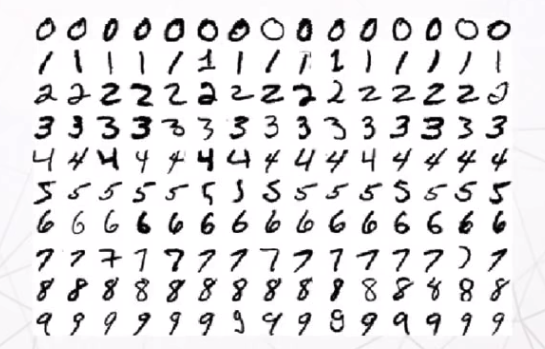

In [2]:
Image('MINST_img.png')

В США это была одна из первых задач МЛ, для распознования почтовых индексов, в США небыло таких гостов написания как у нас, поэтому им надо было понимать, что это за цифра

Сейчас мы повторим успех США в создании первой глубокой нейронной сети и и научим нашу нейронку распозновать рукописные цифры

Входные данные
* Интенсивность пикселов в изображении
* Количество значений: 784(28*28 пикселов)

Какая будет нейронная сеть:
* 800 нейронов

Выходной слой:
* 10 нейронов
* Вероятность изображения

Выходной слой:

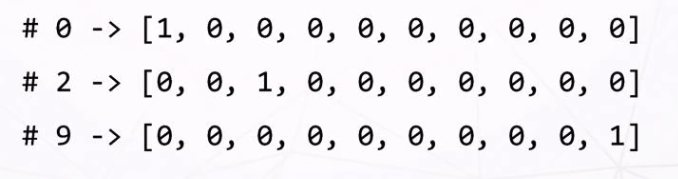

In [3]:
Image('Выходной слой.png')

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

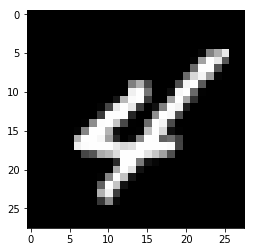

In [6]:
plt.imshow(toimage(X_train[127]).convert('RGBA'))
plt.show()

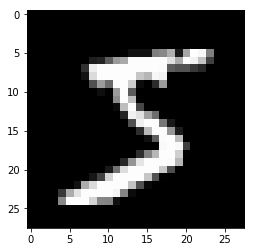

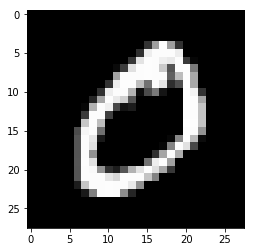

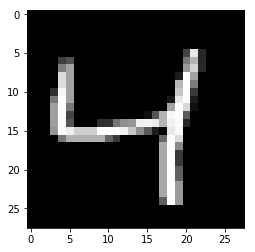

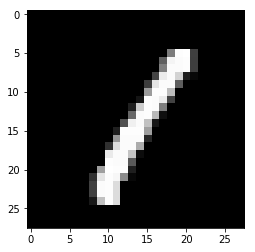

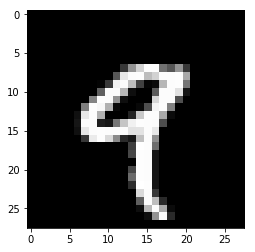

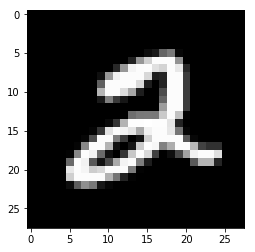

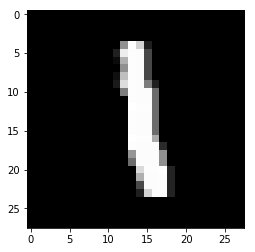

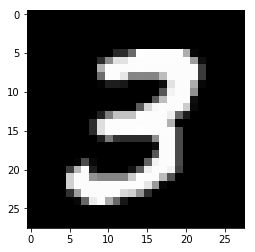

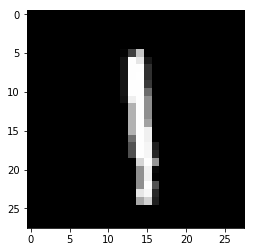

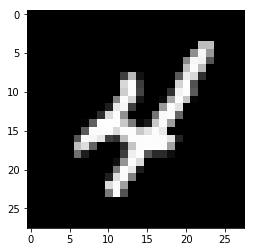

In [7]:
for i in range(10):
    plt.imshow(toimage(X_train[i]).convert('RGBA'))
    plt.show()

In [8]:
X_train.shape[0]

60000

In [10]:
X_train.shape[1]*X_train.shape[2]

784

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [11]:
X_train = X_train.astype('float32')
X_train = X_train / 255 

In [12]:
print(y_train[127])

4


In [13]:
y_train = utils.to_categorical(y_train, 10)

In [14]:
print(y_train[127])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [33]:
model = Sequential()

In [34]:
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(500, activation='relu'))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

In [35]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 1,033,510
Trainable params: 1,033,510
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
model.fit(X_train, y_train, batch_size=200, epochs=20,  verbose=1)

Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2261 - acc: 0.9339
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0804 - acc: 0.9752
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0481 - acc: 0.9848
Epoch 4/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0344 - acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0218 - acc: 0.9933
Epoch 6/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0179 - acc: 0.9945
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0202 - acc: 0.9934
Epoch 8/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0132 - acc: 0.9956
Epoch 9/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0156 - acc: 0.9947
Epoch 10/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0116 - acc: 0.9959

KeyboardInterrupt: 

In [21]:
img_path = '3.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

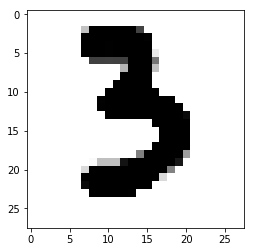

In [22]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [23]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [24]:
prediction = model.predict(x)

In [25]:
print(prediction)

[[3.4893188e-22 1.4146234e-14 6.8449435e-10 1.0000000e+00 8.0957035e-26
  2.8134919e-10 2.3270615e-19 3.8958102e-22 1.1281621e-12 7.8448692e-16]]


In [26]:
print(np.argmax(prediction))

3


In [27]:
img_path = '2.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

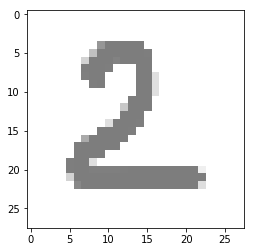

In [28]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [29]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

In [30]:
prediction = model.predict(x)

In [31]:
prediction

array([[1.2196959e-09, 6.8827903e-06, 9.9803323e-01, 1.9673646e-05,
        1.5807325e-13, 5.2101441e-06, 1.8058216e-07, 7.2336304e-10,
        1.9347414e-03, 8.0251880e-13]], dtype=float32)

In [32]:
print(np.argmax(prediction))

2
